<a href="https://colab.research.google.com/github/adlathifa/Customer_Lifecycle_Analytics/blob/main/E_commerce_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rishikumarrajvansh/marketing-insights-for-e-commerce-company/data")

Skipping, found downloaded files in "./marketing-insights-for-e-commerce-company" (use force=True to force download)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import datetime as dt

import scipy.stats as stats
import statsmodels.api as sm

## Data Preparation

In [4]:
Customer_Data = pd.read_excel("/content/marketing-insights-for-e-commerce-company/CustomersData.xlsx")
Discount_Coupon = pd.read_csv("/content/marketing-insights-for-e-commerce-company/Discount_Coupon.csv")
Marketing_Spend = pd.read_csv("/content/marketing-insights-for-e-commerce-company/Marketing_Spend.csv")
Online_Sales = pd.read_csv("/content/marketing-insights-for-e-commerce-company/Online_Sales.csv")
Tax_Amount = pd.read_excel("/content/marketing-insights-for-e-commerce-company/Tax_amount.xlsx")

In [5]:
for df in [Customer_Data, Discount_Coupon, Marketing_Spend, Online_Sales, Tax_Amount]:
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


None

## Customer Cohort

In [6]:
Online_Sales.describe()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,4.497638,52.237646,10.517630
std,1766.55602,8648.668977,20.104711,64.006882,19.475613
min,12346.00000,16679.000000,1.000000,0.390000,0.000000
25%,13869.00000,25384.000000,1.000000,5.700000,6.000000
50%,15311.00000,32625.500000,1.000000,16.990000,6.000000
75%,16996.25000,39126.250000,2.000000,102.130000,6.500000
max,18283.00000,48497.000000,900.000000,355.740000,521.360000


In [7]:
# Convert the Transaction_Date column to datetime format
Online_Sales['Transaction_Date'] = pd.to_datetime(Online_Sales['Transaction_Date'])
# Extract the month and year from 'Transaction_Date' and store it in a new column 'Order_Month'
Online_Sales['Order_Month'] = Online_Sales['Transaction_Date'].dt.to_period('M')
# Create a new DataFrame with only 'CustomerID' and their corresponding 'Order_Month'
Customer_Cohort = Online_Sales[['CustomerID','Order_Month']].copy()

In [8]:
# Create a 'Cohort_Month' column that indicates the month of the customer's first purchase
Customer_Cohort['Cohort_Month'] = Customer_Cohort.groupby('CustomerID')['Order_Month'].transform('min')

# Calculate the difference in months between each transaction and the customer's cohort month, then add 1 to start from period 1
from operator import attrgetter
Customer_Cohort['Periode'] = (Customer_Cohort['Order_Month'] - Customer_Cohort['Cohort_Month']).apply(attrgetter('n')) + 1

Customer_Cohort

,CustomerID,Order_Month,Cohort_Month,Periode
0,17850,2019-01,2019-01,1
1,17850,2019-01,2019-01,1
2,17850,2019-01,2019-01,1
3,17850,2019-01,2019-01,1
4,17850,2019-01,2019-01,1
...,...,...,...,...
52919,14410,2019-12,2019-12,1
52920,14410,2019-12,2019-12,1
52921,14410,2019-12,2019-12,1
52922,14600,2019-12,2019-12,1


In [9]:
# Group the data by 'Cohort_Month' and 'Periode', then count the number of unique customers in each group
Cust_Cohort_Data = Customer_Cohort.groupby(['Cohort_Month','Periode'])['CustomerID'].nunique().reset_index()
Cust_Cohort_Data

,Cohort_Month,Periode,CustomerID
0,2019-01,1,215
1,2019-01,2,13
2,2019-01,3,24
3,2019-01,4,34
4,2019-01,5,23
...,...,...,...
73,2019-10,2,6
74,2019-10,3,4
75,2019-11,1,68
76,2019-11,2,7


In [10]:
# Pivot the data to create a cohort table with 'Cohort_Month' as rows, 'Periode' as columns, and the number of unique customers as values
Cust_Cohort_Pivot = Cust_Cohort_Data.pivot(index='Cohort_Month',columns='Periode',values='CustomerID')
Cust_Cohort_Pivot

Periode,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2019-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Extract the first column of the cohort table, which represents the number of customers in each cohort's first month
Cust_Cohort_Size = Cust_Cohort_Pivot.iloc[:, 0]
Cust_Cohort_Size

,1
Cohort_Month,
2019-01,215.0
2019-02,96.0
2019-03,177.0
2019-04,163.0
2019-05,112.0
2019-06,137.0
2019-07,94.0
2019-08,135.0
2019-09,78.0


In [12]:
# Calculate the retention rate by dividing each row in the cohort table by the cohort size (first month customer count)
Retention = Cust_Cohort_Pivot.divide(Cust_Cohort_Size, axis=0)
Retention

Periode,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2019-01,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
2019-02,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
2019-03,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
2019-04,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
2019-05,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
2019-06,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


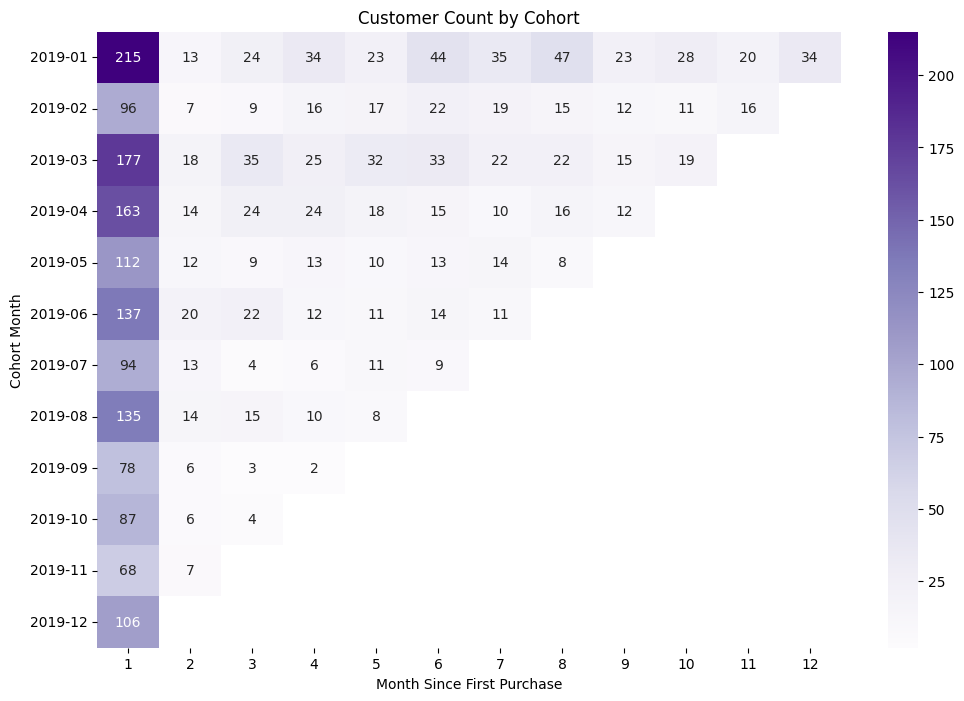

In [13]:
# Create a heatmap to visualize the number of customers in each cohort over time
plt.figure(figsize=(12, 8))
sns.heatmap(Cust_Cohort_Pivot, annot=True, fmt='.0f', cmap='Purples')
plt.title('Customer Count by Cohort')
plt.xlabel('Month Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

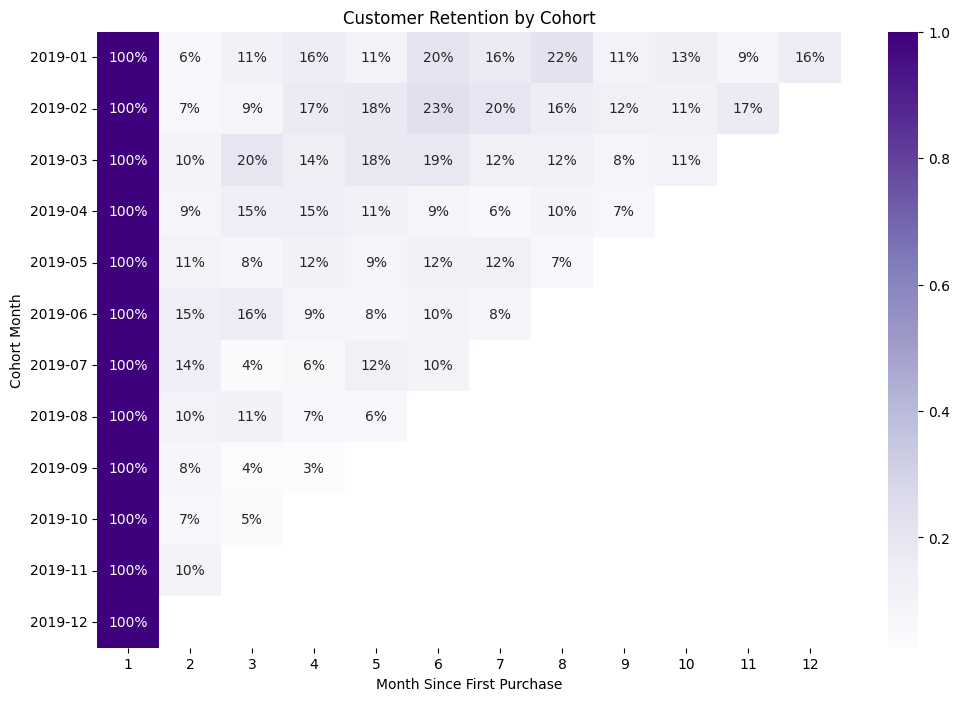

In [14]:
# Create a heatmap to visualize the customer retention rate for each cohort over time
plt.figure(figsize=(12, 8))
sns.heatmap(Retention, annot=True, fmt='.0%', cmap='Purples')
plt.title('Customer Retention by Cohort')
plt.xlabel('Month Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

Most customers made a purchase in their first month, followed by a sharp drop in the following months. The January cohort had the highest number of new customers (215) and showed relatively strong retention up to month 8, with noticeable increases in months 6 and 8, possibly due to special promotions or campaigns.

The March cohort showed stable retention up to month 6, suggesting that some customers can become loyal with the right strategy. However, long-term retention remains low, indicating that the company should improve its engagement efforts to retain customers for a longer period.

## Nett Revenue

In [15]:
# Convert 'Month' column to datetime period format
Discount_Coupon['Month'] = '2019 ' + Discount_Coupon['Month'].astype(str)
Discount_Coupon['Month'] = pd.to_datetime(Discount_Coupon['Month'], format='%Y %b').dt.to_period('M')

# Join Online_Sales with Discount_Coupon on 'Order_Month' and 'Product_Category'
Sales_Discount = pd.merge(Online_Sales, Discount_Coupon, how='left', left_on = ['Order_Month', 'Product_Category'], right_on = ['Month', 'Product_Category'])

# Join the result with Tax_Amount on 'Product_Category'
Total_Sales = pd.merge(Sales_Discount, Tax_Amount, how='left', on='Product_Category')

# Calculate Gross Amount before discount (Quantity * Average Price)
Total_Sales['Gross_Amount'] = Total_Sales['Quantity'] * Total_Sales['Avg_Price']

# Fill missing discount percentage values with 0 and calculate Discount Amount
Total_Sales['Discount_pct'] = Total_Sales['Discount_pct'].fillna(0)
Total_Sales['Discount_Amount'] = Total_Sales['Gross_Amount'] * Total_Sales['Discount_pct'] /100

# Fill missing GST values with 0 and calculate Tax Amount
Total_Sales['GST'] = Total_Sales['GST'].fillna(0)
Total_Sales['Tax_Amount'] = Total_Sales['Gross_Amount'] * Total_Sales['GST'] /100

# Calculate Nett Revenue after applying discount, adding delivery charges, and subtracting tax
Total_Sales['Nett_Revenue'] = (Total_Sales['Gross_Amount'] - Total_Sales['Discount_Amount'] + Total_Sales['Delivery_Charges'] - Total_Sales['Tax_Amount'])
Total_Sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Order_Month,Month,Coupon_Code,Discount_pct,GST,Gross_Amount,Discount_Amount,Tax_Amount,Nett_Revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01,2019-01,ELEC10,10.0,0.10,153.71,15.371,0.153710,144.685290
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,2019-01,2019-01,ELEC10,10.0,0.10,153.71,15.371,0.153710,144.685290
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,2019-01,2019-01,OFF10,10.0,0.10,2.05,0.205,0.002050,8.342950
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,2019-01,2019-01,SALE10,10.0,0.18,87.65,8.765,0.157770,85.227230
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,2019-01,2019-01,AIO10,10.0,0.18,16.50,1.650,0.029700,21.320300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,2019-12,2019-12,ELEC30,30.0,0.10,121.30,36.390,0.121300,91.288700
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,2019-12,2019-12,SALE30,30.0,0.18,48.92,14.676,0.088056,40.655944
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,2019-12,2019-12,ELEC30,30.0,0.10,151.88,45.564,0.151880,112.664120
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,2019-12,2019-12,ELEC30,30.0,0.10,402.60,120.780,0.402600,287.917400


In [16]:
# Create a new dataframe containing only CustomerID, Order_Month, and Nett_Revenue
Nett_Revenue = Total_Sales[['CustomerID', 'Order_Month', 'Nett_Revenue']].copy()

# Determine the Cohort_Month for each customer (their first purchase month)
Nett_Revenue['Cohort_Month'] = Nett_Revenue.groupby('CustomerID')['Order_Month'].transform('min')

# Calculate the period (in months) since the customer's first purchase
from operator import attrgetter
Nett_Revenue['Periode'] = (Nett_Revenue['Order_Month'] - Nett_Revenue['Cohort_Month']).apply(attrgetter('n')) + 1
Nett_Revenue

,CustomerID,Order_Month,Nett_Revenue,Cohort_Month,Periode
0,17850,2019-01,144.685290,2019-01,1
1,17850,2019-01,144.685290,2019-01,1
2,17850,2019-01,8.342950,2019-01,1
3,17850,2019-01,85.227230,2019-01,1
4,17850,2019-01,21.320300,2019-01,1
...,...,...,...,...,...
52919,14410,2019-12,91.288700,2019-12,1
52920,14410,2019-12,40.655944,2019-12,1
52921,14410,2019-12,112.664120,2019-12,1
52922,14600,2019-12,287.917400,2019-12,1


In [17]:
# Group by 'Cohort_Month' and 'Periode', then sum the Nett_Revenue for each cohort-period combination
Nett_Revenue_Cohort = Nett_Revenue.groupby(['Cohort_Month', 'Periode'])['Nett_Revenue'].sum().reset_index()

# Pivot the grouped data to create a cohort revenue table with 'Cohort_Month' as rows and 'Periode' as columns
Nett_Revenue_Cohort = Nett_Revenue_Cohort.pivot(index='Cohort_Month', columns='Periode', values='Nett_Revenue')
Nett_Revenue_Cohort

Periode,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2019-01,422304.938449,37396.767444,45061.245313,110770.645081,28698.748753,43242.168362,84711.939173,47913.741861,33578.057027,45761.433340,34956.699480,71263.12617
2019-02,260606.609986,7342.809193,13057.755462,20790.817879,19523.670685,43286.441540,23123.232029,36087.585941,16749.227025,24961.238505,36527.843334,NaN
2019-03,253869.986121,40502.618931,33519.582502,24434.340707,48222.098201,64033.441649,38170.430917,39490.651977,21533.654729,28368.341287,NaN,NaN
2019-04,238590.128057,21038.317336,13355.676137,30493.006451,23910.425707,23798.257168,15659.037232,48614.888821,14246.039108,NaN,NaN,NaN
2019-05,183944.570476,5421.975118,12810.822749,14350.068744,13592.190668,36888.115904,32616.401166,8859.242341,NaN,NaN,NaN,NaN
2019-06,156508.524252,11401.004978,12480.012804,13411.655865,10294.069640,32185.230634,12014.657804,NaN,NaN,NaN,NaN,NaN
2019-07,153046.057719,13680.620382,5699.043359,14395.348461,20546.070144,22150.183193,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,182482.924124,8266.064046,10980.113206,24820.069830,12739.872306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,120618.676951,1839.899036,2233.895320,521.616973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


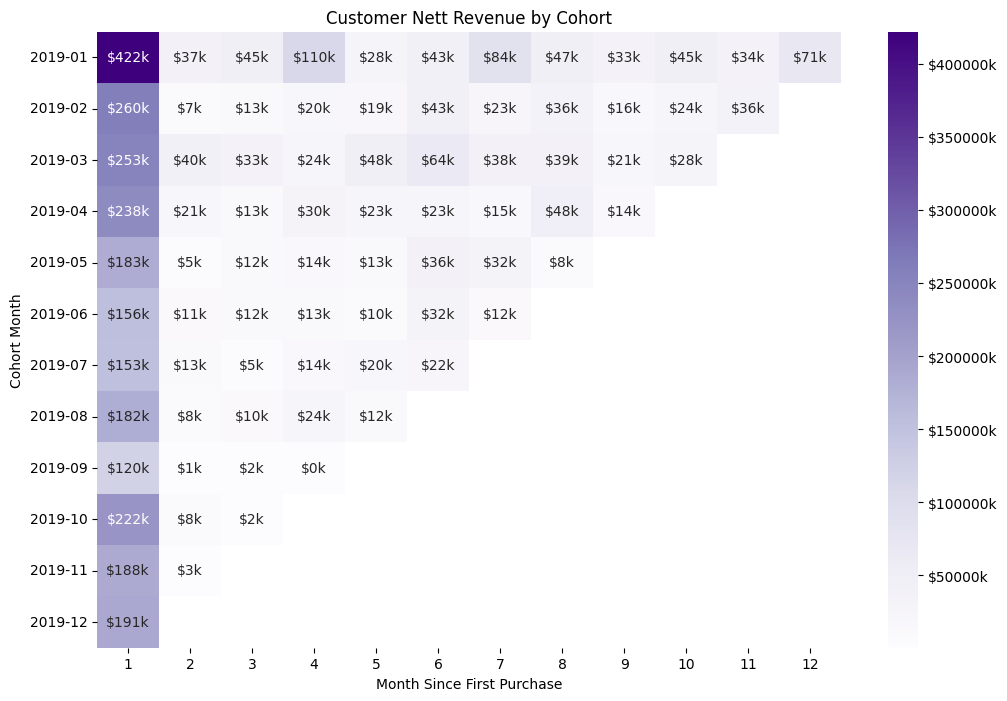

In [18]:
# Create a heatmap to visualize customer nett revenue by cohort over time
plt.figure(figsize=(12,8))
ax = sns.heatmap(Nett_Revenue_Cohort, annot=True, fmt='.0f', cmap='Purples', cbar_kws={'format': '$%dk'})
plt.title('Customer Nett Revenue by Cohort')
plt.xlabel('Month Since First Purchase')
plt.ylabel('Cohort Month')

# Format the annotation texts to display values in thousands with a '$k' suffix
for text in ax.texts:
  val = text.get_text()
  if val.isdigit():
    val_k = f"${int(val)//1000}k"
    text.set_text(val_k)

plt.show()

The January cohort had the highest revenue in month 1, but it dropped in the following months. However, revenue rose significantly in months 4, 7, and 12, possibly due to promotions or re-engagement efforts. The March cohort still generated moderate revenue until month 6, showing that customers stayed active for a short period. Other cohorts also showed a similar pattern, with some revenue increases in the last three months of their journey.